In [28]:
import pandas as pd

In [29]:
!ls ../CSVs/Fondeo3/

'25abril25_Whistle FONDEO3_verificado FINAL.csv'


In [30]:
# take list of csv files in ../CSVs/ and read them into a dictionary of dataframes
csv_files = !ls ../CSVs/Fondeo3/

In [31]:
VALIDATION = "Fondeo3"

In [32]:
# !ls /mnt/e/DeepLearning/Predictions/whistle_predictions.csv

In [33]:
df = pd.DataFrame()

# # Load file
for file in csv_files:
    df = pd.concat([df, pd.read_csv(f'../CSVs/{VALIDATION}/{file}')])

# df = pd.read_csv(f'/mnt/e/DeepLearning/Predictions/whistle_predictions.csv')

In [34]:
df

,Idx,Specie,File,Validation,Suggested Specie,Comment
0,1,Whistle,channelA_2024-06-25_11-36-01_865_870_0.66.WAV,0,What?,NaN
1,2,Whistle,channelA_2024-06-25_12-41-34_1093_1098_0.62.WAV,0,What?,NaN
2,3,Whistle,channelA_2024-06-26_03-37-24_826_831_0.56.WAV,0,What?,NaN
3,4,Whistle,channelA_2024-06-26_07-15-54_973_978_0.68.WAV,0,Motor boat,NaN
4,5,Whistle,channelA_2024-06-26_09-05-09_547_552_0.63.WAV,0,Motor boat,NaN
...,...,...,...,...,...,...
369,370,Whistle,channelA_2024-07-14_17-21-54_136_141_0.63.WAV,0,Ambiental,NaN
370,371,Whistle,channelA_2024-07-15_06-06-38_1270_1275_0.57.WAV,0,Motor boat,tono motor
371,372,Whistle,channelA_2024-07-15_07-55-53_163_168_0.89.WAV,0,What?,no idea
372,373,Whistle,channelA_2024-07-15_07-55-53_166_171_0.99.WAV,0,What?,no idea


In [35]:
# Rename MainClassification as Whistle and Create column Validation with value 1 and Suggested Specie Whistle
# df.rename(columns={'MainClassification': 'Specie'}, inplace=True)
# df['Validation'] = 1
# df['Suggested Specie'] = 'Whistle'

In [36]:
df = df[df['Validation'] != -100]
# df = df[df['Validation'] != -1]
# df = df[df['Validation'] != -2]

In [37]:
# reset index
df = df.reset_index(drop=True)

In [38]:
# Change validation values to Correct if 1, Other specie if 0, Unknown if -2, Bird if 2
df['Validation_Val'] = df['Validation'].map({1: 'Correct', 0: 'Other', -2: 'Unknown', 2: 'Cetacean', -1: 'Incorrect'})

<Figure size 1200x800 with 0 Axes>

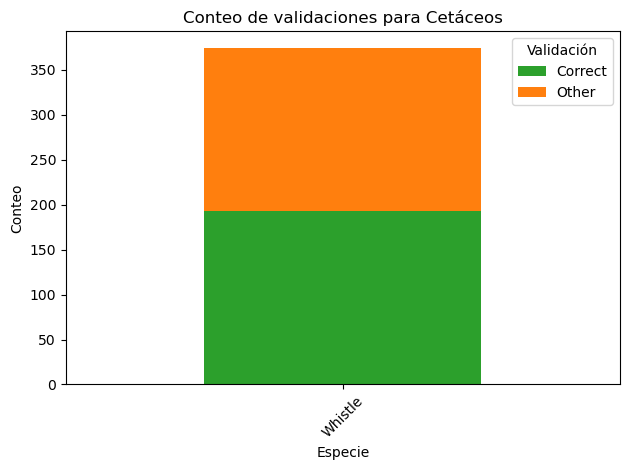

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame


# Green for Correct, Orange for Bird, Red for Other specie, Blue for Unknown
colors = {'Correct': 'C2', 'Cetacean': 'C8', 'Other': 'C1', 'Unknown': 'C0', "Incorrect:": "C3"}

# Group by 'Specie' and 'Validation' and count occurrences
grouped = df.groupby(['Specie', 'Validation_Val']).size().unstack(fill_value=0)

# Ensure the columns are in the correct order
grouped = grouped[['Correct', 'Other']] # , 'Other specie', 'Cetacean'

# Plotting
plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', stacked=True, color=[colors[val] for val in grouped.columns])
plt.title('Conteo de validaciones para Cetáceos')
plt.xlabel('Especie')
plt.ylabel('Conteo')
plt.legend(title='Validación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
df["Suggested Specie"].unique()

array(['What?', 'Motor boat', 'Ferry', nan, 'Ambiental', 'DESCARTAR',
       'Whistle'], dtype=object)

In [45]:
# If validation is correct, set the suggested specie is the same as the specie
df.loc[df['Validation'] == 1, 'Suggested Specie'] = df['Specie']
# if Validation is -2, set Suggested Specie to Cetacean
df.loc[df['Validation'] == 2, 'Suggested Specie'] = 'Whistle'

In [41]:
# # Drop rows where Validation is Unknown and Bird in df
# print(len(df))

# df = df[df.Validation != 'Unknown']
# df = df[df.Validation != 'Bird']

# print(len(df))

In [46]:
# rename Path as File
df.rename(columns={'Path': 'File'}, inplace=True)

In [47]:
# Reset the index to ensure unique labels
df = df.reset_index(drop=True)

df["SegmentFile"] = df["File"]
df["StartSecond"] = df["File"].str.split("_").str.get(-3)
df["EndSecond"] = df["File"].str.split("_").str.get(-2)
# df["ConfidenceScore"] = df["File"].str.replace(".WAV","").str.split("_").str.get(-1)
# File = File split but last 4 elements separated by _
df["File"] = df["File"].str.split('_').str[:-4].str.join('_') + ".WAV"
df

,Idx,Specie,File,Validation,Suggested Specie,Comment,Validation_Val,SegmentFile,StartSecond,EndSecond
0,1,Whistle,channelA_2024-06-25.WAV,0,What?,NaN,Other,channelA_2024-06-25_11-36-01_865_870_0.66.WAV,865,870
1,2,Whistle,channelA_2024-06-25.WAV,0,What?,NaN,Other,channelA_2024-06-25_12-41-34_1093_1098_0.62.WAV,1093,1098
2,3,Whistle,channelA_2024-06-26.WAV,0,What?,NaN,Other,channelA_2024-06-26_03-37-24_826_831_0.56.WAV,826,831
3,4,Whistle,channelA_2024-06-26.WAV,0,Motor boat,NaN,Other,channelA_2024-06-26_07-15-54_973_978_0.68.WAV,973,978
4,5,Whistle,channelA_2024-06-26.WAV,0,Motor boat,NaN,Other,channelA_2024-06-26_09-05-09_547_552_0.63.WAV,547,552
...,...,...,...,...,...,...,...,...,...,...
369,370,Whistle,channelA_2024-07-14.WAV,0,Ambiental,NaN,Other,channelA_2024-07-14_17-21-54_136_141_0.63.WAV,136,141
370,371,Whistle,channelA_2024-07-15.WAV,0,Motor boat,tono motor,Other,channelA_2024-07-15_06-06-38_1270_1275_0.57.WAV,1270,1275
371,372,Whistle,channelA_2024-07-15.WAV,0,What?,no idea,Other,channelA_2024-07-15_07-55-53_163_168_0.89.WAV,163,168
372,373,Whistle,channelA_2024-07-15.WAV,0,What?,no idea,Other,channelA_2024-07-15_07-55-53_166_171_0.99.WAV,166,171


In [52]:
# Create column StartRecordingTimestamp from File (channelA_YYYY-MM-DD_HH-MM-SS.WAV)
# df["StartRecordingTimestamp"] = df["File"].str.split('_').str.get(1) + " " + df["File"].str.split('_').str.get(2).str.replace(".WAV","")
# df["StartRecordingTimestamp"] = pd.to_datetime(df["StartRecordingTimestamp"], format="%Y-%m-%d %H-%M-%S")

# Ensure StartSecond and EndSecond are numeric before using them
df["StartSecond"] = pd.to_numeric(df["StartSecond"], errors='coerce')
df["EndSecond"] = pd.to_numeric(df["EndSecond"], errors='coerce')

# Handle any potential NaN values after conversion
df["StartSecond"] = df["StartSecond"].fillna(0).astype(int)
df["EndSecond"] = df["EndSecond"].fillna(0).astype(int)

df["ConfidenceScore"] = df["SegmentFile"].str.split("_").str.get(-1).str.replace(".WAV","")

# StartAnnotationTimestamp = StartRecordingTimestamp + StartSecond
# df["StartAnnotationTimestamp"] = df["StartRecordingTimestamp"] + pd.to_timedelta(df["StartSecond"], unit='s')
# # EndAnnotationTimestamp = StartRecordingTimestamp + EndSecond
# df["EndAnnotationTimestamp"] = df["StartRecordingTimestamp"] + pd.to_timedelta(df["EndSecond"], unit='s')

# Order of columns: File, SegmentFile, StartSecond, EndSecond, StartRecordingTimestamp, StartAnnotationTimestamp, EndAnnotationTimestamp, Specie, Validation, Suggested Specie, ConfidenceScore
# df = df[['File', 'SegmentFile', 'StartSecond', 'EndSecond', 'StartRecordingTimestamp', 'StartAnnotationTimestamp', 'EndAnnotationTimestamp', 'Specie', 'Validation', 'Suggested Specie', 'ConfidenceScore']]
df = df[['File', 'SegmentFile', 'StartSecond', 'EndSecond', 'Specie', 'Validation', 'Suggested Specie', 'ConfidenceScore']]
df

/tmp/ipykernel_1375299/3649982287.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["StartSecond"] = pd.to_numeric(df["StartSecond"], errors='coerce')
/tmp/ipykernel_1375299/3649982287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EndSecond"] = pd.to_numeric(df["EndSecond"], errors='coerce')
/tmp/ipykernel_1375299/3649982287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,File,SegmentFile,StartSecond,EndSecond,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-06-25.WAV,channelA_2024-06-25_11-36-01_865_870_0.66.WAV,865,870,Whistle,0,What?,0.66
1,channelA_2024-06-25.WAV,channelA_2024-06-25_12-41-34_1093_1098_0.62.WAV,1093,1098,Whistle,0,What?,0.62
2,channelA_2024-06-26.WAV,channelA_2024-06-26_03-37-24_826_831_0.56.WAV,826,831,Whistle,0,What?,0.56
3,channelA_2024-06-26.WAV,channelA_2024-06-26_07-15-54_973_978_0.68.WAV,973,978,Whistle,0,Motor boat,0.68
4,channelA_2024-06-26.WAV,channelA_2024-06-26_09-05-09_547_552_0.63.WAV,547,552,Whistle,0,Motor boat,0.63
...,...,...,...,...,...,...,...,...
369,channelA_2024-07-14.WAV,channelA_2024-07-14_17-21-54_136_141_0.63.WAV,136,141,Whistle,0,Ambiental,0.63
370,channelA_2024-07-15.WAV,channelA_2024-07-15_06-06-38_1270_1275_0.57.WAV,1270,1275,Whistle,0,Motor boat,0.57
371,channelA_2024-07-15.WAV,channelA_2024-07-15_07-55-53_163_168_0.89.WAV,163,168,Whistle,0,What?,0.89
372,channelA_2024-07-15.WAV,channelA_2024-07-15_07-55-53_166_171_0.99.WAV,166,171,Whistle,0,What?,0.99


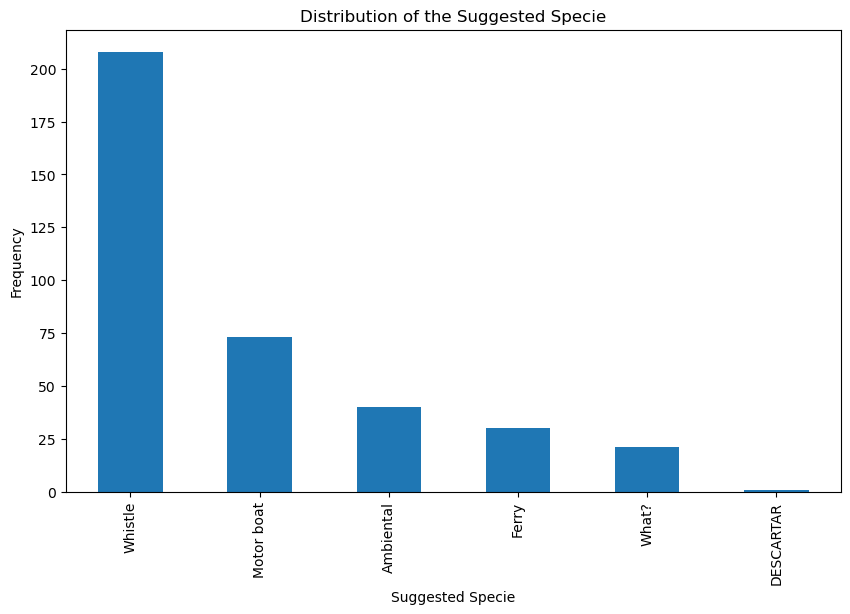

In [53]:
import matplotlib.pyplot as plt
# Distribution of the Altertative
plt.figure(figsize=(10, 6))
df['Suggested Specie'].value_counts().plot(kind='bar')
plt.xlabel('Suggested Specie')
plt.ylabel('Frequency')
plt.title('Distribution of the Suggested Specie')
plt.show()

In [54]:
df

,File,SegmentFile,StartSecond,EndSecond,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-06-25.WAV,channelA_2024-06-25_11-36-01_865_870_0.66.WAV,865,870,Whistle,0,What?,0.66
1,channelA_2024-06-25.WAV,channelA_2024-06-25_12-41-34_1093_1098_0.62.WAV,1093,1098,Whistle,0,What?,0.62
2,channelA_2024-06-26.WAV,channelA_2024-06-26_03-37-24_826_831_0.56.WAV,826,831,Whistle,0,What?,0.56
3,channelA_2024-06-26.WAV,channelA_2024-06-26_07-15-54_973_978_0.68.WAV,973,978,Whistle,0,Motor boat,0.68
4,channelA_2024-06-26.WAV,channelA_2024-06-26_09-05-09_547_552_0.63.WAV,547,552,Whistle,0,Motor boat,0.63
...,...,...,...,...,...,...,...,...
369,channelA_2024-07-14.WAV,channelA_2024-07-14_17-21-54_136_141_0.63.WAV,136,141,Whistle,0,Ambiental,0.63
370,channelA_2024-07-15.WAV,channelA_2024-07-15_06-06-38_1270_1275_0.57.WAV,1270,1275,Whistle,0,Motor boat,0.57
371,channelA_2024-07-15.WAV,channelA_2024-07-15_07-55-53_163_168_0.89.WAV,163,168,Whistle,0,What?,0.89
372,channelA_2024-07-15.WAV,channelA_2024-07-15_07-55-53_166_171_0.99.WAV,166,171,Whistle,0,What?,0.99


In [55]:
df["Suggested Specie"].unique()

array(['What?', 'Motor boat', 'Ferry', 'Whistle', 'Ambiental',
       'DESCARTAR', nan], dtype=object)

In [56]:
# count number of rows with each Suggested Specie
df['Suggested Specie'].value_counts()

Suggested Specie
Whistle       208
Motor boat     73
Ambiental      40
Ferry          30
What?          21
DESCARTAR       1
Name: count, dtype: int64

In [57]:
# delete rows where Suggested Specie is " "
# df = df[df['Suggested Specie'] != " "]
# delete rows with Suggestions = WHAT?
df = df[df['Suggested Specie'] != 'WHAT?']
df = df[df['Suggested Specie'] != 'DESCARTAR']

In [58]:
df.loc[df['Suggested Specie'].isin(['Ferry_Fast ferry']), 'Suggested Specie'] = 'Ferry_FastFerry'
df.loc[df['Suggested Specie'].isin(['Ferry']), 'Suggested Specie'] = 'Ferry_FastFerry'
df.loc[df['Suggested Specie'].isin(['Motor boat']), 'Suggested Specie'] = 'Motor_boat'
df.loc[df['Suggested Specie'].isin(['Big motor boat']), 'Suggested Specie'] = 'Motor_boat'
df.loc[df['Suggested Specie'].isin(['Respiracion']), 'Suggested Specie'] = 'Breath'
df.loc[df['Suggested Specie'].isin(['Ambiental']), 'Suggested Specie'] = 'Background'

In [59]:
# whistle, human_diver_1_breath, human_diver_2_wee, Ferry_FastFerry, Motor_boat
# # If CommonDolphin, KillerWhale or Cetacean, set Suggested Specie to Whistle
# df.loc[df['Suggested Specie'].isin(['CommonDolphin', 'KillerWhale', 'Cetacean']), 'Suggested Specie'] = 'Whistle'
# # If Human_diver set to Human_diver_1_breath
# df.loc[df['Suggested Specie'].isin(['Human_diver']), 'Suggested Specie'] = 'Human_diver_1_breath'
# # If Diver+wee set to Human_diver_2_wee
# df.loc[df['Suggested Specie'].isin(['Diver+wee']), 'Suggested Specie'] = 'Human_diver_2_wee'
# # If Motor boat set to Motor_boat
# df.loc[df['Suggested Specie'].isin(['Motor boat']), 'Suggested Specie'] = 'Motor_boat'
# # If Ferry set to Ferry_FastFerry
# df.loc[df['Suggested Specie'].isin(['Ferry']), 'Suggested Specie'] = 'Ferry_FastFerry'
df

,File,SegmentFile,StartSecond,EndSecond,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-06-25.WAV,channelA_2024-06-25_11-36-01_865_870_0.66.WAV,865,870,Whistle,0,What?,0.66
1,channelA_2024-06-25.WAV,channelA_2024-06-25_12-41-34_1093_1098_0.62.WAV,1093,1098,Whistle,0,What?,0.62
2,channelA_2024-06-26.WAV,channelA_2024-06-26_03-37-24_826_831_0.56.WAV,826,831,Whistle,0,What?,0.56
3,channelA_2024-06-26.WAV,channelA_2024-06-26_07-15-54_973_978_0.68.WAV,973,978,Whistle,0,Motor_boat,0.68
4,channelA_2024-06-26.WAV,channelA_2024-06-26_09-05-09_547_552_0.63.WAV,547,552,Whistle,0,Motor_boat,0.63
...,...,...,...,...,...,...,...,...
369,channelA_2024-07-14.WAV,channelA_2024-07-14_17-21-54_136_141_0.63.WAV,136,141,Whistle,0,Background,0.63
370,channelA_2024-07-15.WAV,channelA_2024-07-15_06-06-38_1270_1275_0.57.WAV,1270,1275,Whistle,0,Motor_boat,0.57
371,channelA_2024-07-15.WAV,channelA_2024-07-15_07-55-53_163_168_0.89.WAV,163,168,Whistle,0,What?,0.89
372,channelA_2024-07-15.WAV,channelA_2024-07-15_07-55-53_166_171_0.99.WAV,166,171,Whistle,0,What?,0.99


In [51]:
# # take only Ferry_FastFerry and Motor_boat and save csv
# df = df[df['Suggested Specie'].isin(['Ferry_FastFerry', 'Motor_boat'])]
# # delete confidence score and specie
# df = df.drop(columns=['ConfidenceScore', 'Specie', 'Validation'])
# # Change Suggested Specie to Annotation
# df = df.rename(columns={'Suggested Specie': 'Annotation'})
# df.to_csv('../CSVs/NOWOPAMDay_456/Ferry_FastFerry_Motor_boat.csv', index=False)

In [52]:
# delete confidence score and specie
# df = df.drop(columns=['ConfidenceScore', 'Specie', 'Validation'])
# # Change Suggested Specie to Annotation
# df = df.rename(columns={'Suggested Specie': 'Annotation'})
# # save csv as wopam_day_annotations.csv
# df.to_csv('wopam_day_annotations.csv', index=False)

In [53]:
df

,File,SegmentFile,StartSecond,EndSecond,StartRecordingTimestamp,StartAnnotationTimestamp,EndAnnotationTimestamp,Specie,Validation,Suggested Specie,ConfidenceScore
0,channelA_2024-05-27_21-43-19.WAV,channelA_2024-05-27_21-43-19_48kHz_286_293_0.5...,286.0,293.0,2024-05-27 21:43:19,2024-05-27 21:48:05,2024-05-27 21:48:12,Whistle,1.0,Whistle,0.56
1,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_0_5_0.98.WAV,0.0,5.0,2024-05-27 21:48:19,2024-05-27 21:48:19,2024-05-27 21:48:24,Whistle,1.0,Whistle,0.98
2,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_103_110_0.9...,103.0,110.0,2024-05-27 21:48:19,2024-05-27 21:50:02,2024-05-27 21:50:09,Whistle,1.0,Whistle,0.91
3,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_106_113_0.9...,106.0,113.0,2024-05-27 21:48:19,2024-05-27 21:50:05,2024-05-27 21:50:12,Whistle,1.0,Whistle,0.98
4,channelA_2024-05-27_21-48-19.WAV,channelA_2024-05-27_21-48-19_48kHz_109_116_1.0...,109.0,116.0,2024-05-27 21:48:19,2024-05-27 21:50:08,2024-05-27 21:50:15,Whistle,1.0,Whistle,1.0
...,...,...,...,...,...,...,...,...,...,...,...
150,channelA_2024-06-12_16-00-33.WAV,channelA_2024-06-12_16-00-33_48kHz_106_113_0.6...,106.0,113.0,2024-06-12 16:00:33,2024-06-12 16:02:19,2024-06-12 16:02:26,Whistle,0.0,Ferry_FastFerry,0.62
151,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_25_32_0.58.WAV,25.0,32.0,2024-06-12 16:15:33,2024-06-12 16:15:58,2024-06-12 16:16:05,Whistle,0.0,Ferry_FastFerry,0.58
152,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_34_41_0.61.WAV,34.0,41.0,2024-06-12 16:15:33,2024-06-12 16:16:07,2024-06-12 16:16:14,Whistle,0.0,Ferry_FastFerry,0.61
153,channelA_2024-06-12_16-15-33.WAV,channelA_2024-06-12_16-15-33_48kHz_40_47_0.61.WAV,40.0,47.0,2024-06-12 16:15:33,2024-06-12 16:16:13,2024-06-12 16:16:20,Whistle,0.0,Ferry_FastFerry,0.61


In [60]:
# show Validation nan
# Drop rows where Validation is nan
df = df.dropna(subset=['Validation'])

In [62]:
# Make Validation integer
df["Validation"] = df["Validation"].astype(int)
df["Validation Value"] = df["Validation"].map({'Whistle': 1, 'Other': 0, 'Unknown': -2, 'Whistle': 2, 'Incorrect': -1})

In [63]:
# Change validation values to Correct if 1, Other specie if 0, Unknown if -2, Bird if 2
df['Validation Value'] = df['Validation'].map({1: 'Whistle', 0: 'Other', -2: 'Unknown', 2: 'Whistle', -1: 'Incorrect'})
df

,File,SegmentFile,StartSecond,EndSecond,Specie,Validation,Suggested Specie,ConfidenceScore,Validation Value
0,channelA_2024-06-25.WAV,channelA_2024-06-25_11-36-01_865_870_0.66.WAV,865,870,Whistle,0,What?,0.66,Other
1,channelA_2024-06-25.WAV,channelA_2024-06-25_12-41-34_1093_1098_0.62.WAV,1093,1098,Whistle,0,What?,0.62,Other
2,channelA_2024-06-26.WAV,channelA_2024-06-26_03-37-24_826_831_0.56.WAV,826,831,Whistle,0,What?,0.56,Other
3,channelA_2024-06-26.WAV,channelA_2024-06-26_07-15-54_973_978_0.68.WAV,973,978,Whistle,0,Motor_boat,0.68,Other
4,channelA_2024-06-26.WAV,channelA_2024-06-26_09-05-09_547_552_0.63.WAV,547,552,Whistle,0,Motor_boat,0.63,Other
...,...,...,...,...,...,...,...,...,...
369,channelA_2024-07-14.WAV,channelA_2024-07-14_17-21-54_136_141_0.63.WAV,136,141,Whistle,0,Background,0.63,Other
370,channelA_2024-07-15.WAV,channelA_2024-07-15_06-06-38_1270_1275_0.57.WAV,1270,1275,Whistle,0,Motor_boat,0.57,Other
371,channelA_2024-07-15.WAV,channelA_2024-07-15_07-55-53_163_168_0.89.WAV,163,168,Whistle,0,What?,0.89,Other
372,channelA_2024-07-15.WAV,channelA_2024-07-15_07-55-53_166_171_0.99.WAV,166,171,Whistle,0,What?,0.99,Other


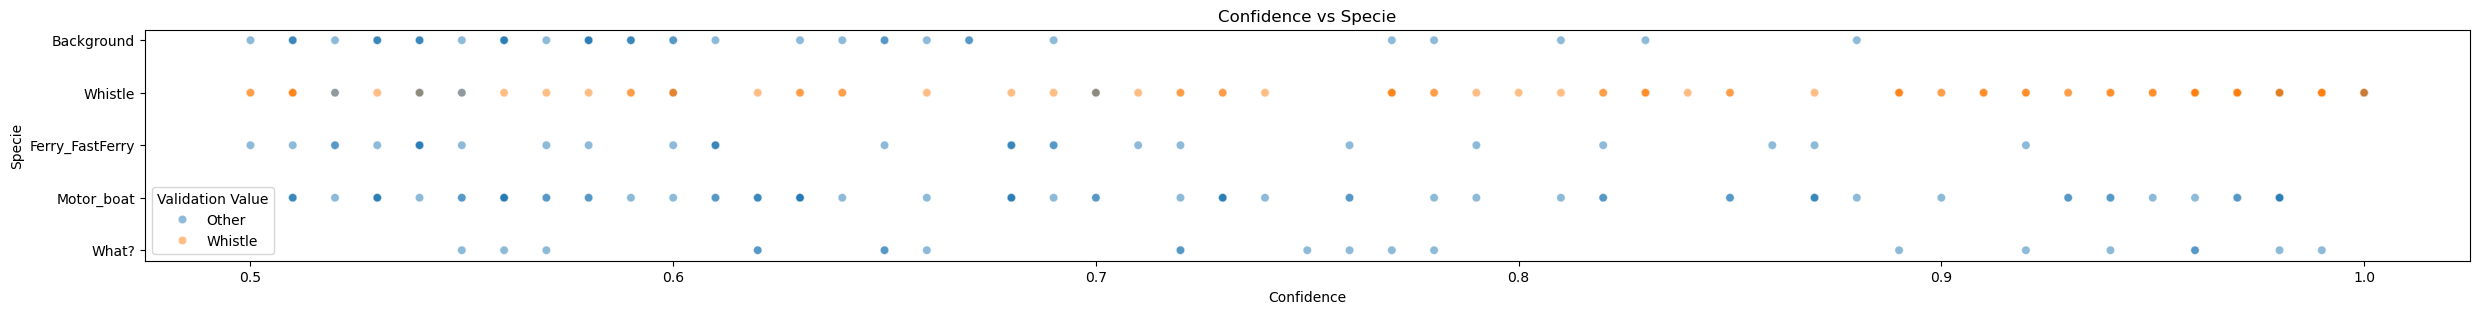

In [66]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Suggested Specie', hue="Validation Value", alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

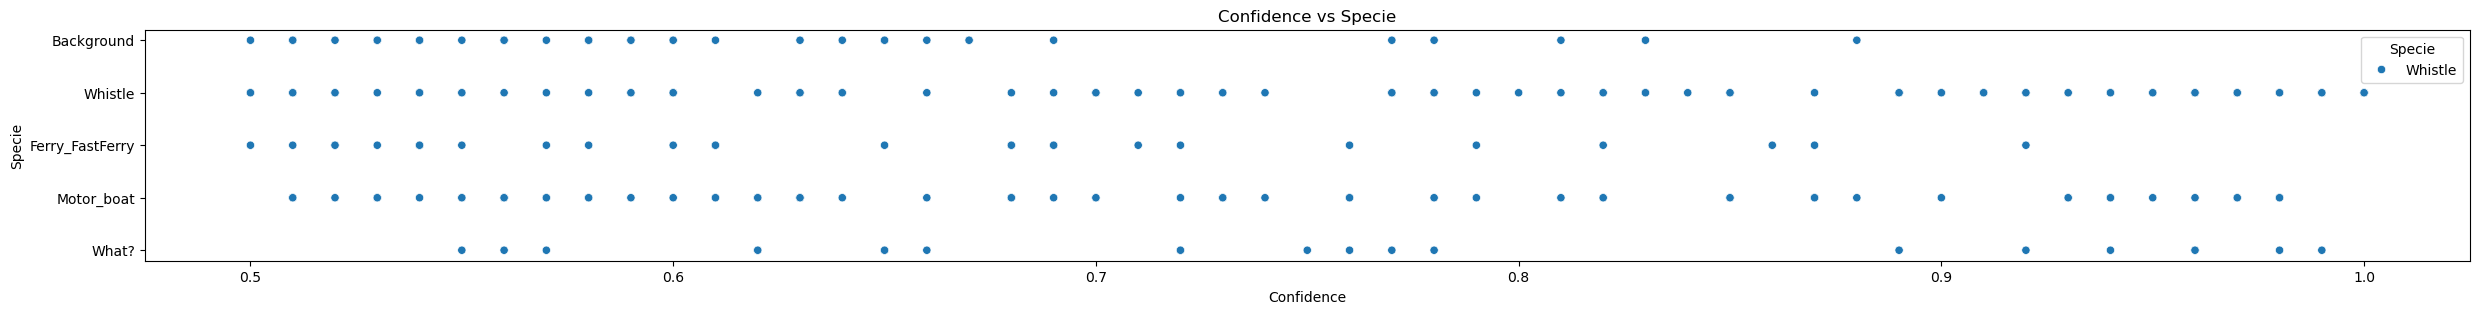

In [67]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Suggested Specie', hue="Specie", alpha=1)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

In [68]:
# Show how many rows are above 0.84 confidece score
df[df['ConfidenceScore'] > 0.84].shape[0]

184

/tmp/ipykernel_1375299/494332848.py:11: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Specie', hue="Validation", alpha=0.5, palette=["C1", "C2", "C0"], s=100)


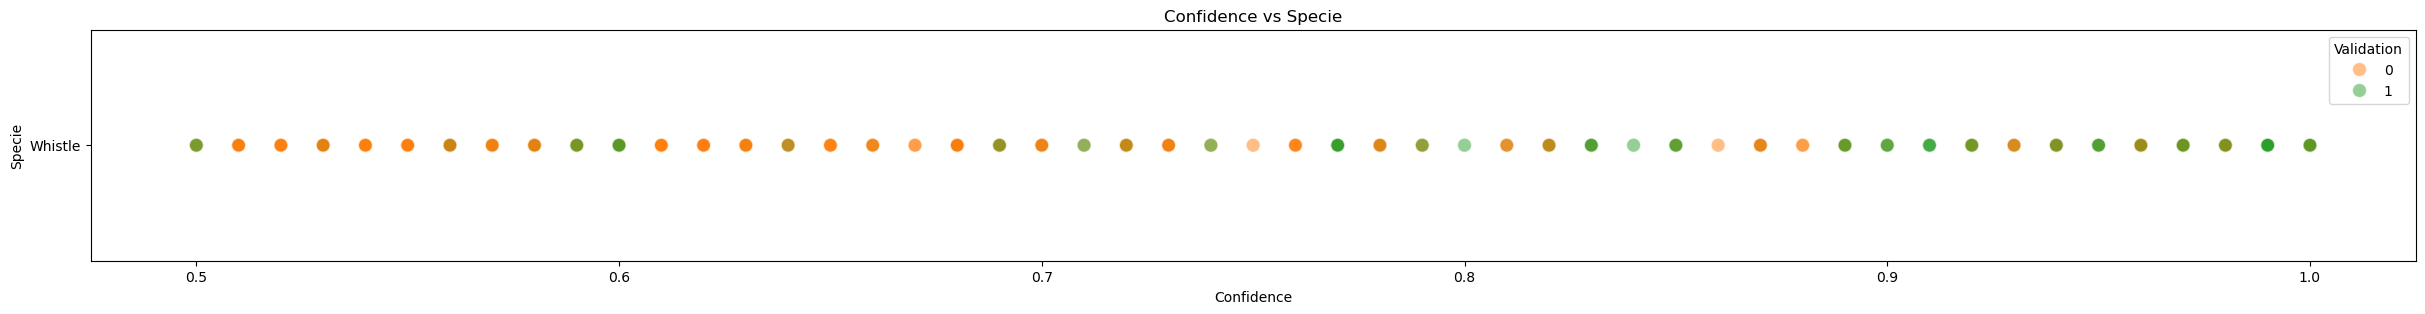

In [69]:
import seaborn as sns

# Convert ConfidenceScore to numeric values
df['ConfidenceScore'] = pd.to_numeric(df['ConfidenceScore'])

# Sort the dataframe by ConfidenceScore
df_sorted = df.sort_values(by='ConfidenceScore')

# Scatter plot with the Validation, Confidence and Specie
plt.figure(figsize=(30, 3))
sns.scatterplot(data=df_sorted, x='ConfidenceScore', y='Specie', hue="Validation", alpha=0.5, palette=["C1", "C2", "C0"], s=100)
plt.xlabel('Confidence')
plt.ylabel('Specie')
plt.title('Confidence vs Specie')
plt.show()

In [ ]:
# df_regression

NameError: name 'df_regression' is not defined

In [70]:
# Logistic regression for df, set Validation to 1 if Whistle or Cetacean and 0 if Other specie or Unknown
df_regression = df.copy()
df_regression.loc[df_regression['Validation'] == 1, 'Validation'] = 1
df_regression.loc[df_regression['Validation'] == 2, 'Validation'] = 1
df_regression.loc[df_regression['Validation'] == 0, 'Validation'] = 0
df_regression.loc[df_regression['Validation'] == -2, 'Validation'] = 0
df_regression.loc[df_regression['Validation'] == -1, 'Validation'] = 0

# Drop columns that are not needed
# df_regression = df_regression.drop(columns=['Specie', 'File', 'SegmentFile', 'StartSecond', 'EndSecond', 'StartRecordingTimestamp', 'StartAnnotationTimestamp', 'EndAnnotationTimestamp', 'Suggested Specie', 'Validation Value'])

Model's probability range: 0.24 to 0.95
Threshold at 40% correctness:
- Logit Score: 1.67
- Confidence Score: 0.84
- Predicted Positives: 184
- Real Positives: 193
- True Positives: 143
- True Positives Lost: 50
- False Positives Included: 41
- False Positives not Included: 139


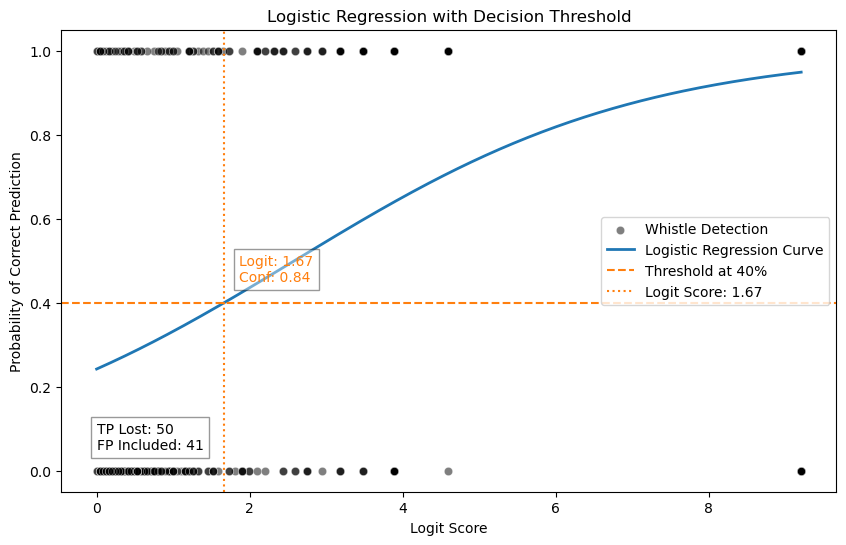

Percentage of missing positives: 0.05%


In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# 1. Fix Confidence Score to Avoid Log Errors (Clip between [0.0001, 0.9999])
df_regression["ConfidenceScore"] = np.clip(df_regression["ConfidenceScore"], 0.0001, 0.9999)

# 2. Convert Confidence Score to Logit Score
df_regression["LogitScore"] = np.round(np.log(df_regression["ConfidenceScore"] / (1 - df_regression["ConfidenceScore"])), 3)

# 3. Extract Features and Target
X = df_regression[['LogitScore']].values  # Use Logit Score as feature
y = df_regression['Validation'].values  # Target variable

# 4. Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X, y)

# 5. Generate Smooth Curve Data for Plotting
X_curve = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_curve_proba = model.predict_proba(X_curve)[:, 1]  # Probability for class 1

# 6. Check Min and Max Confidence Score from Model
min_confidence = y_curve_proba.min()
max_confidence = y_curve_proba.max()
print(f"Model's probability range: {min_confidence:.2f} to {max_confidence:.2f}")

# 7. User-defined Correctness Threshold (Y-axis value)
correctness_threshold = 0.40  # Change this value to test different thresholds

# 8. Find Logit Score for Given Probability (X-axis intersection)
logit_threshold = np.interp(correctness_threshold, y_curve_proba, X_curve.flatten())

# 9. Convert Logit Score to Confidence Score using Sigmoid Function
confidence_threshold = 1 / (1 + np.exp(-logit_threshold))

# 10. Count True Positives Lost & False Positives Included
predicted_labels = (X >= logit_threshold).astype(int).flatten()
total_positives = np.sum(y == 1)
true_positives = np.sum((predicted_labels == 1) & (y == 1))
false_positives = np.sum((predicted_labels == 1) & (y == 0))

# 11. Plot the Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, color='black', alpha=0.5, label="Whistle Detection")  # Black dots
plt.plot(X_curve, y_curve_proba, color='C0', linewidth=2, label="Logistic Regression Curve")  # Blue curve

# 12. Add Threshold Lines
plt.axhline(correctness_threshold, color='C1', linestyle='dashed', label=f"Threshold at {correctness_threshold*100:.0f}%")
plt.axvline(logit_threshold, color='C1', linestyle='dotted', label=f"Logit Score: {logit_threshold:.2f}")

# 13. Add Text Annotations on Plot
plt.text(logit_threshold + 0.2, correctness_threshold + 0.05, 
         f"Logit: {logit_threshold:.2f}\nConf: {confidence_threshold:.2f}", 
         color='C1', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

plt.text(X.min(), 0.05, 
         f"TP Lost: {total_positives - true_positives}\nFP Included: {false_positives}", 
         color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

# Labels and Title
plt.xlabel('Logit Score')
plt.ylabel('Probability of Correct Prediction')
plt.title('Logistic Regression with Decision Threshold')
plt.legend()

# 14. Print Threshold Details in Console
print(f"Threshold at {correctness_threshold*100:.0f}% correctness:")
print(f"- Logit Score: {logit_threshold:.2f}")
print(f"- Confidence Score: {confidence_threshold:.2f}")
print(f"- Predicted Positives: {true_positives + false_positives}")
print(f"- Real Positives: {total_positives}")
print(f"- True Positives: {true_positives}")
print(f"- True Positives Lost: {total_positives - true_positives}")
print(f"- False Positives Included: {false_positives}")
print(f"- False Positives not Included: {np.sum((predicted_labels == 0) & (y == 0))}")

plt.show()

# % of missing positives
missing_positives = ((total_positives - (true_positives + false_positives))) / (true_positives + false_positives)
print(f"Percentage of missing positives: {missing_positives:.2f}%")

In [99]:
9 / 184

0.04891304347826087

In [101]:
# 19% of 63
184 * 0.05 + 184

193.2

In [95]:
12 + 63

75

Model's probability range: 0.24 to 0.95
Threshold at 40% correctness:
- Logit Score: 1.32
- Confidence Score: 0.79
- Predicted Positives: 201
- Real Positives: 193
- True Positives: 152
- True Positives Lost: 41
- False Positives Included: 49
- False Positives not Included: 131


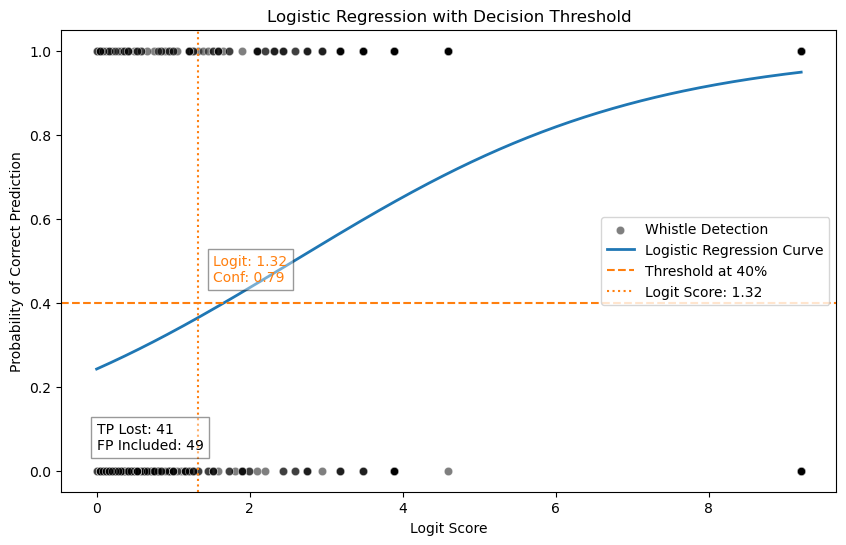

Percentage of missing positives: -0.04%


In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# 1. Fix Confidence Score to Avoid Log Errors (Clip between [0.0001, 0.9999])
df_regression["ConfidenceScore"] = np.clip(df_regression["ConfidenceScore"], 0.0001, 0.9999)

# 2. Convert Confidence Score to Logit Score
df_regression["LogitScore"] = np.round(np.log(df_regression["ConfidenceScore"] / (1 - df_regression["ConfidenceScore"])), 3)

# 3. Extract Features and Target
X = df_regression[['LogitScore']].values  # Use Logit Score as feature
y = df_regression['Validation'].values  # Target variable

# 4. Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X, y)

# 5. Generate Smooth Curve Data for Plotting
X_curve = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_curve_proba = model.predict_proba(X_curve)[:, 1]  # Probability for class 1

# 6. Check Min and Max Confidence Score from Model
min_confidence = y_curve_proba.min()
max_confidence = y_curve_proba.max()
print(f"Model's probability range: {min_confidence:.2f} to {max_confidence:.2f}")

# 7. User-defined Correctness Threshold (Y-axis value)
# correctness_threshold = 0.365  # Change this value to test different thresholds
confidence_threshold = 0.79

# 8. Find Logit Score for Given Probability (X-axis intersection)
# logit_threshold = np.interp(correctness_threshold, y_curve_proba, X_curve.flatten())
logit_threshold = np.log(confidence_threshold / (1 - confidence_threshold))

# 9. Convert Logit Score to Confidence Score using Sigmoid Function
# confidence_threshold = 1 / (1 + np.exp(-logit_threshold))

# 10. Count True Positives Lost & False Positives Included
predicted_labels = (X >= logit_threshold).astype(int).flatten()
total_positives = np.sum(y == 1)
total_negatives = np.sum(y == 0)
true_positives = np.sum((predicted_labels == 1) & (y == 1))
false_positives = np.sum((predicted_labels == 1) & (y == 0))

# 11. Plot the Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, color='black', alpha=0.5, label="Whistle Detection")  # Black dots
plt.plot(X_curve, y_curve_proba, color='C0', linewidth=2, label="Logistic Regression Curve")  # Blue curve

# 12. Add Threshold Lines
plt.axhline(correctness_threshold, color='C1', linestyle='dashed', label=f"Threshold at {correctness_threshold*100:.0f}%")
plt.axvline(logit_threshold, color='C1', linestyle='dotted', label=f"Logit Score: {logit_threshold:.2f}")

# 13. Add Text Annotations on Plot
plt.text(logit_threshold + 0.2, correctness_threshold + 0.05, 
         f"Logit: {logit_threshold:.2f}\nConf: {confidence_threshold:.2f}", 
         color='C1', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

plt.text(X.min(), 0.05, 
         f"TP Lost: {total_positives - true_positives}\nFP Included: {false_positives}", 
         color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.4))

# Labels and Title
plt.xlabel('Logit Score')
plt.ylabel('Probability of Correct Prediction')
plt.title('Logistic Regression with Decision Threshold')
plt.legend()

# 14. Print Threshold Details in Console
print(f"Threshold at {correctness_threshold*100:.0f}% correctness:")
print(f"- Logit Score: {logit_threshold:.2f}")
print(f"- Confidence Score: {confidence_threshold:.2f}")
print(f"- Predicted Positives: {true_positives + false_positives}")
print(f"- Real Positives: {total_positives}")
print(f"- True Positives: {true_positives}")
print(f"- True Positives Lost: {total_positives - true_positives}")
print(f"- False Positives Included: {false_positives}")
print(f"- False Positives not Included: {np.sum((predicted_labels == 0) & (y == 0))}")

plt.show()

missing_positives = ((total_positives - (true_positives + false_positives))) / (true_positives + false_positives)
print(f"Percentage of missing positives: {missing_positives:.2f}%")

In [82]:
# Show df_regression sorted by LogitScore
df_regression.sort_values(by='LogitScore', ascending=True)

,File,SegmentFile,StartSecond,EndSecond,Specie,Validation,Suggested Specie,ConfidenceScore,Validation Value,LogitScore
20,channelA_2024-06-27.WAV,channelA_2024-06-27_20-24-35_1120_1125_0.5.WAV,1120,1125,Whistle,0,Background,0.5000,Other,0.00
332,channelA_2024-07-13.WAV,channelA_2024-07-13_20-36-27_205_210_0.5.WAV,205,210,Whistle,1,Whistle,0.5000,Whistle,0.00
72,channelA_2024-07-01.WAV,channelA_2024-07-01_05-37-01_868_873_0.5.WAV,868,873,Whistle,0,Ferry_FastFerry,0.5000,Other,0.00
224,channelA_2024-07-11.WAV,channelA_2024-07-11_01-36-09_1114_1119_0.5.WAV,1114,1119,Whistle,1,Whistle,0.5000,Whistle,0.00
313,channelA_2024-07-13.WAV,channelA_2024-07-13_20-14-36_1141_1146_0.51.WAV,1141,1146,Whistle,1,Whistle,0.5100,Whistle,0.04
...,...,...,...,...,...,...,...,...,...,...
254,channelA_2024-07-12.WAV,channelA_2024-07-12_01-16-21_1141_1146_1.0.WAV,1141,1146,Whistle,1,Whistle,0.9999,Whistle,9.21
253,channelA_2024-07-12.WAV,channelA_2024-07-12_01-16-21_1129_1134_1.0.WAV,1129,1134,Whistle,1,Whistle,0.9999,Whistle,9.21
252,channelA_2024-07-12.WAV,channelA_2024-07-12_01-16-21_1117_1122_1.0.WAV,1117,1122,Whistle,1,Whistle,0.9999,Whistle,9.21
85,channelA_2024-07-02.WAV,channelA_2024-07-02_23-52-14_817_822_1.0.WAV,817,822,Whistle,0,Whistle,0.9999,Other,9.21


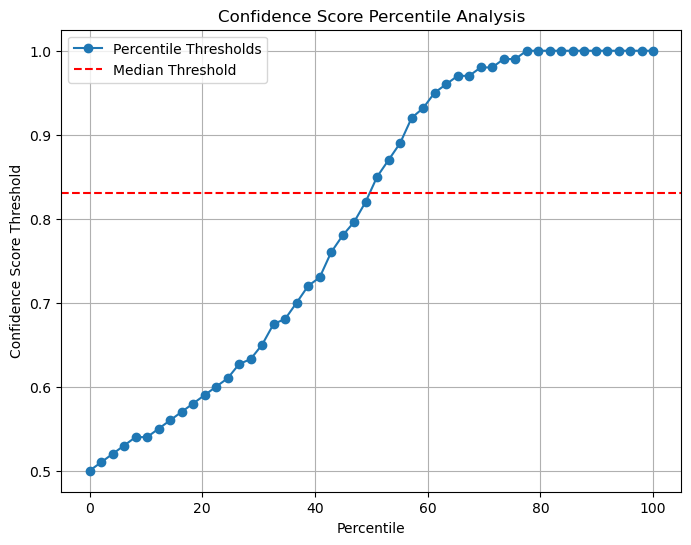

Best Confidence Score Threshold (90th Percentile): 1.00


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract confidence scores from your regression DataFrame
confidence_scores = df_regression["ConfidenceScore"].values

# Sort confidence scores
sorted_confidence = np.sort(confidence_scores)

# Define percentiles to analyze
percentiles = np.linspace(0, 100, 50)  # 50 evenly spaced percentiles
thresholds = np.percentile(sorted_confidence, percentiles)

# Plot Confidence Score Percentile Analysis
plt.figure(figsize=(8, 6))
plt.plot(percentiles, thresholds, marker='o', linestyle='-', color='C0', label="Percentile Thresholds")
plt.xlabel('Percentile')
plt.ylabel('Confidence Score Threshold')
plt.title('Confidence Score Percentile Analysis')
plt.axhline(y=np.median(sorted_confidence), color='r', linestyle='dashed', label="Median Threshold")
plt.legend()
plt.grid()
plt.show()

# Select best threshold (e.g., 90th percentile as a decision boundary)
best_threshold = np.percentile(sorted_confidence, 90)
print(f"Best Confidence Score Threshold (90th Percentile): {best_threshold:.2f}")


Best Confidence Score Threshold: 0.89


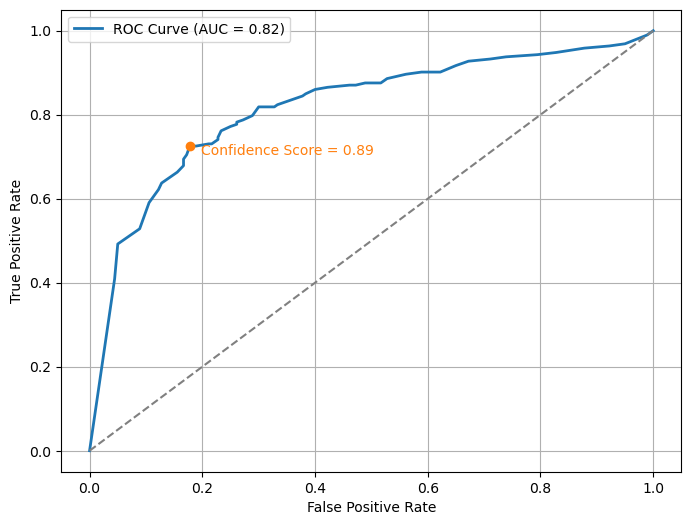

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Extract Confidence Scores & Validation Labels (1 = Correct, 0 = Incorrect)
y_true = df_regression["Validation"].values  # 1 = Correct Prediction, 0 = Incorrect Prediction
y_scores = df_regression["ConfidenceScore"].values  # Model's confidence score

# Compute ROC Curve (False Positive Rate & True Positive Rate)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)  # Compute AUC Score

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='C0', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='dashed')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
plt.legend()
plt.grid()

# Find the Best Threshold (Closest to (0,1) on ROC Curve)
best_index = np.argmax(tpr - fpr)  # Maximize TPR - FPR
best_threshold = thresholds[best_index]

# Highlight the best threshold on the graph
plt.scatter(fpr[best_index], tpr[best_index], color='C1', label=f'Best Threshold = {best_threshold:.2f}', zorder=5)
plt.text(fpr[best_index] + 0.02, tpr[best_index] - 0.02, 
         f"Confidence Score = {best_threshold:.2f}", 
         color='C1', fontsize=10)

print(f"Best Confidence Score Threshold: {best_threshold:.2f}")

plt.show()


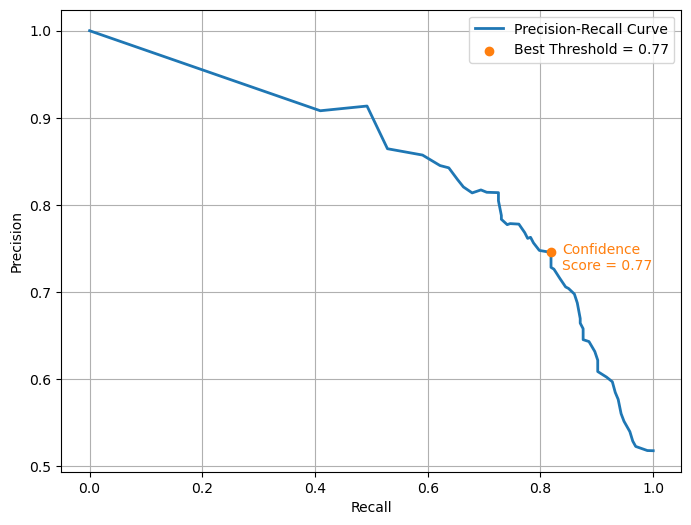

Precision-Recall AUC: 0.85
Best Confidence Score Threshold for Precision-Recall Curve: 0.77


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Extract Confidence Scores & Validation Labels (1 = Correct, 0 = Incorrect)
y_true = df_regression["Validation"].values  # 1 = Correct Prediction, 0 = Incorrect Prediction
y_scores = df_regression["ConfidenceScore"].values  # Model's confidence score

# Compute Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='C0', lw=2, label='Precision-Recall Curve')

# Highlight the best threshold
best_threshold_index = np.argmax(precision + recall)
best_threshold = thresholds[best_threshold_index]
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='C1', label=f'Best Threshold = {best_threshold:.2f}', zorder=5)
plt.text(recall[best_threshold_index] + 0.02, precision[best_threshold_index] - 0.02, 
         f"Confidence\nScore = {best_threshold:.2f}", color='C1', fontsize=10)

# Labels and Title
plt.xlabel('Recall')
plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Calculate AUC for Precision-Recall Curve
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.2f}")
print(f"Best Confidence Score Threshold for Precision-Recall Curve: {best_threshold:.2f}")

In [86]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Calculate Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Find the index where the sum of Precision and Recall is maximized
best_threshold_index = np.argmax(precision + recall)

# Get the best threshold value
best_threshold = thresholds[best_threshold_index]

# Print out the best threshold and corresponding precision and recall values
print(f"Best Confidence Score Threshold (Max Precision + Recall): {best_threshold:.2f}")
print(f"Precision at Threshold: {precision[best_threshold_index]:.2f}")
print(f"Recall at Threshold: {recall[best_threshold_index]:.2f}")

Best Confidence Score Threshold (Max Precision + Recall): 0.77
Precision at Threshold: 0.75
Recall at Threshold: 0.82
